[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW9.ipynb)

**Problem 1**: The data set machine.csv can be loaded using the code
machine = pd.read_csv("https://richardson.byu.edu/220/machine.csv")
The target variable is the cost to maintain a certain type of energy production machinery. The predictors are weight of the machine, the attitude of the region the machine is located towards coal and oil refinery, the type of machine (front or back loading) and the industry the machine is in (coal or oil).

**Part a.** Build and tune a linear regression model to predict the target variable, Cost, using all the other variables besides car_name as predictors.  Tune the model so that only significant features remain.

In [38]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.formula.api as smf

machine = pd.read_csv("https://richardson.byu.edu/220/machine.csv")

print(machine.head())
print()

for column in machine.select_dtypes(exclude=['float64', 'int64']).columns:
    print(f"Column: {column}")
    print(machine[column].value_counts(), "\n")


    Cost  Weight  Attitude   Type Industry
0  6.068   16.60  Negative  Front      Oil
1  4.602   20.37  Negative  Front      Oil
2  3.282   20.37  Negative  Front      Oil
3  2.192   20.37  Negative   Back      Oil
4  2.572   20.37  Negative   Back      Oil

Column: Attitude
Attitude
Negative    167
Positive    122
Name: count, dtype: int64 

Column: Type
Type
Front    177
Back     112
Name: count, dtype: int64 

Column: Industry
Industry
Oil     263
Coal     26
Name: count, dtype: int64 



In [32]:

import statsmodels.formula.api as smf


train_data, test_data = train_test_split(machine, test_size=0.2, random_state=1234)

model_formula = 'Cost ~ Weight + Attitude + Type + Industry'
model = smf.ols(formula=model_formula, data=train_data).fit()

print(model.summary())

y_pred = model.predict(test_data)
print(f"Train mean: {train_data['Cost'].mean()}")
print(f"Test mean: {test_data['Cost'].mean()}")


                            OLS Regression Results                            
Dep. Variable:                   Cost   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     150.5
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.54e-62
Time:                        05:41:39   Log-Likelihood:                -707.37
No. Observations:                 231   AIC:                             1425.
Df Residuals:                     226   BIC:                             1442.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.2807 

**Part b.** Plot the Cost of the machine against Weight. Distinguish the color of each. point based on the type of Industry. Repeat this to make plots for Cost against Weight with colors distinguished for attitude and machine type.

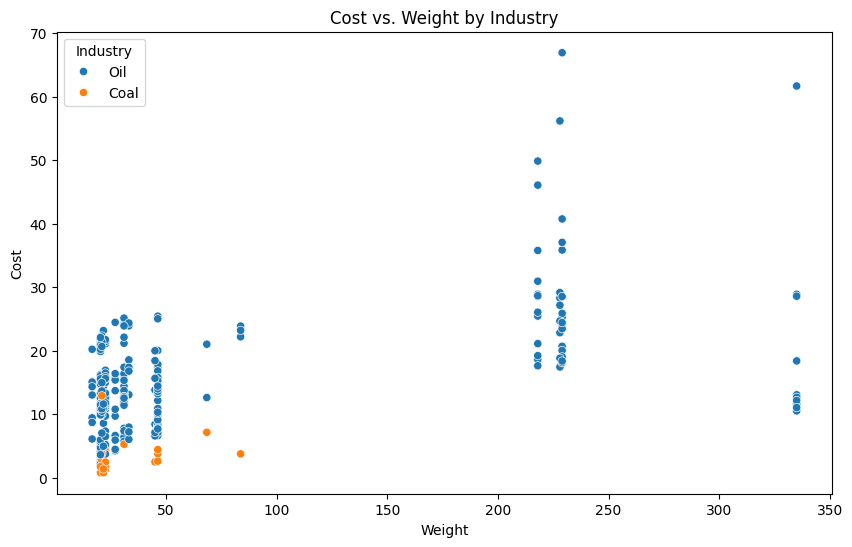

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=machine, x='Weight', y='Cost', hue='Industry')
plt.title('Cost vs. Weight by Industry')
plt.xlabel('Weight')
plt.ylabel('Cost')
plt.show()

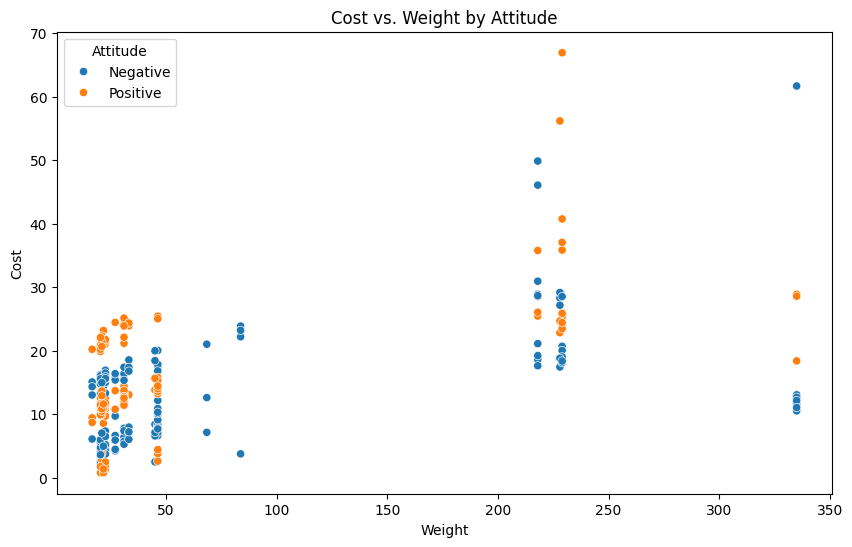

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=machine, x='Weight', y='Cost', hue='Attitude')
plt.title('Cost vs. Weight by Attitude')
plt.xlabel('Weight')
plt.ylabel('Cost')
plt.show()

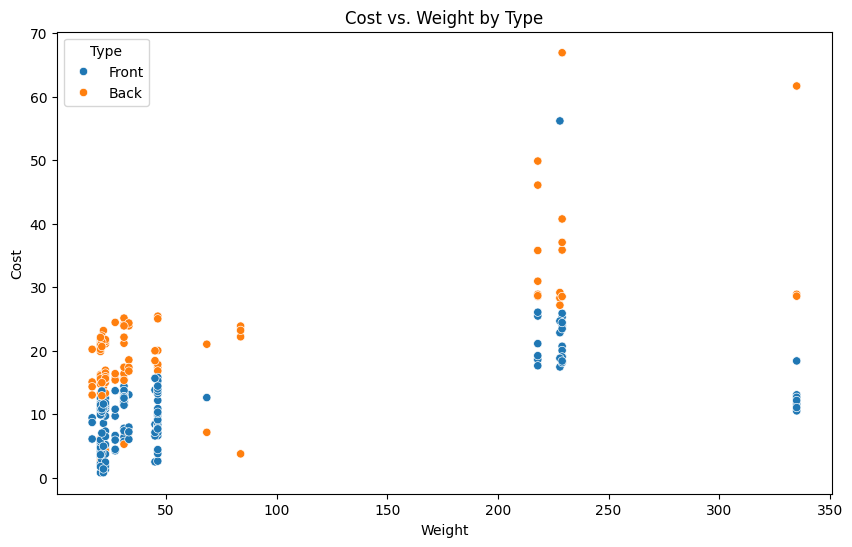

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=machine, x='Weight', y='Cost', hue='Type')
plt.title('Cost vs. Weight by Type')
plt.xlabel('Weight')
plt.ylabel('Cost')
plt.show()

**Part c.** Try building a model with only Weight, Industry, and an interaction between Wieght and Industry as predictors. Interpret the meaning of the coefficients in this case.

In [43]:
model_two = smf.ols('Cost ~ Weight * Industry', data=machine).fit()

print(model_two.summary())

                            OLS Regression Results                            
Dep. Variable:                   Cost   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     57.55
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           4.10e-29
Time:                        05:50:40   Log-Likelihood:                -990.43
No. Observations:                 289   AIC:                             1989.
Df Residuals:                     285   BIC:                             2004.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

**Part d.** Plot the fitted regression lines for the model in Part c on top of the plot between Weight and Cost, with the data colored according to Industry.

**Problem 2.**

**Part a.** For the model created in Problem 1a, using all the variables in the model tuned to significant features, report the out of sample R^2 value.

**Part b**. Start with a model with all the predictors. Add in Weight^2 and interactions between weight and each other predictor. Tune the model to keep only significant features. Report the out of sample R^2 for this model.

**Problem 3**

Let's try a full end to end problem with all the steps. The insurance data set we worked with before has several more variables. The full data set with all the variables can be found at https://richardson.byu.edu/220/insurance_all.csv. Analyze this data by doing the following:

1. Apply a log transformation to the target variable **charges**
2. Split the data into train and test sets
3. Standardize the continuous predictors and the target on the training set and apply to the test set
4. Fit and tune a regression model and evaluate on out of sample performance.

**Problem 4** Repeat problem 3, but this time include all higher order terms and interactions.

**Problem 5** Repeat problem 3, but this time, instead of including all higher order terms and interactions, select 2 or 3 that may be important based on the final model you found in problem 4. Add those to the model instead of including all higher order terms.